In [15]:
import numpy as np
import pandas as pd
import torch
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


##### your directory should be structured as

- my-notebook.ipynb

- SkinDisease
    - train
    - test

In [3]:
train_dir = "SkinDisease/train"
test_dir = "SkinDisease/test"

img_sz = 224
batch_sz = 32

##### Transformations


In [ ]:
train_aug = v2.Compose([
    v2.Resize((img_sz, img_sz)),
    v2.RandomHorizontalFlip(),
    v2.GaussianBlur(kernel_size=[3, 5], sigma=(0.1, 2)),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# test_aug = v2.Compose([
#     v2.Resize((img_sz, img_sz)),
# ])

##### leaning about our dataset .....
1. how many images and classes --> plot them on a graph

In [14]:
class_names = []
img_count = []

for dir in os.listdir(train_dir):
    # print(dir)
    class_names.append(dir)
    img_count.append(len([file for file in os.listdir(train_dir +'/'+ dir)]))


print("No.of class labels we have is:", len(class_names))

No.of class labels we have is: 22


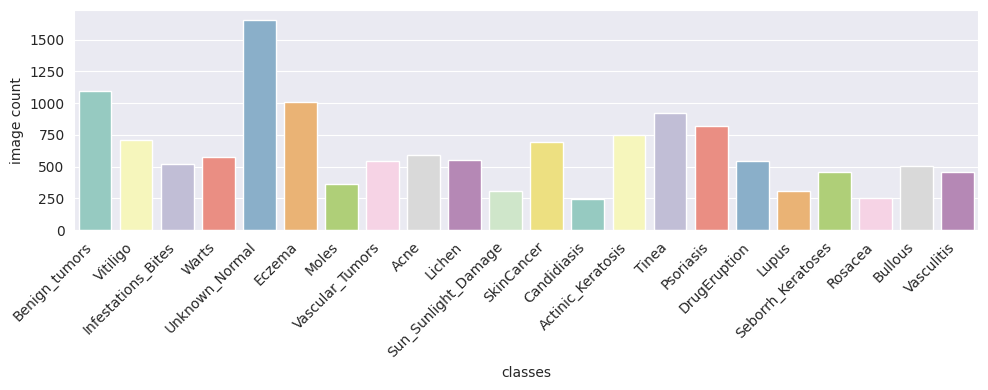

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.barplot(x=class_names, y=img_count, palette='Set3')
plt.xlabel('classes')
plt.ylabel('image count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [34]:
print(img_count)

[1093, 714, 524, 580, 1651, 1010, 361, 543, 593, 553, 312, 693, 248, 748, 923, 820, 547, 311, 455, 254, 504, 461]


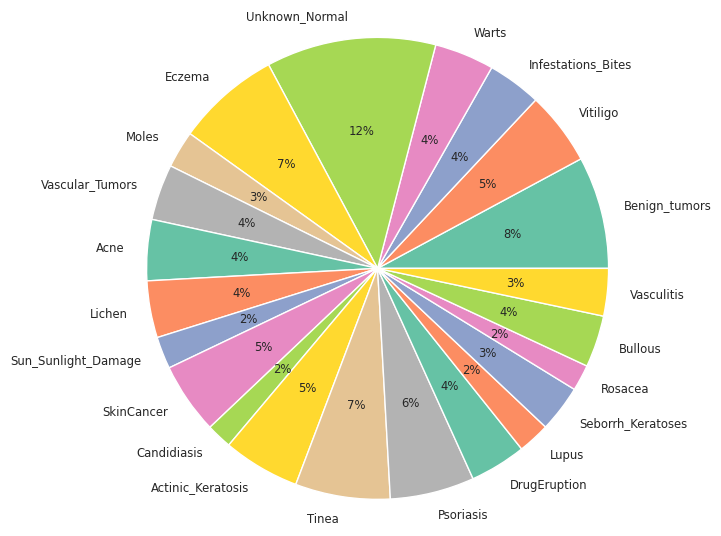

In [44]:
plt.figure(figsize=(5, 5))
colors = sns.color_palette('Set2')
plt.pie(img_count, labels=class_names, autopct='%.0f%%', colors=colors, textprops={'size': 'smaller'}, radius=1.5)
plt.show()

##### uneven number of exaples in the dataset makes it biased, need to apply some techniques